# GARCH time series, posterior predictive distributions $p(x_n | x_{n-i...}, D)$ and $p(x_{n} | x_{n+i...}, D')$

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import torch

In [7]:
from bayesian import BayesianThreeFCLayers, prepare_simple_1d_time_series
from generate_time_series import load_garch_time_series

In [5]:
# np.random.seed(43)  # Reproducible GARCH generation

## Forward

In [12]:
!ls '20230724_preds/garch03/'

noisy_ts.torch		   targets_b.torch  windows_b.torch
predictive.backward.torch  targets_f.torch  windows_f.torch
predictive.forward.torch   ts.torch


In [29]:
pred_f = torch.load("20230724_preds/garch03/predictive.forward.torch")
x_test_f = torch.load("20230724_preds/garch03/windows_f.torch")
targets_f = torch.load("20230724_preds/garch03/targets_f.torch")
pred_f_obs = pred_f(windows_f)["obs"]
print(preds.shape)

torch.Size([100, 1997, 1])


In [37]:
sorted_pairs_true_pred = sorted(zip(targets_f.squeeze(-1), pred_f_obs.squeeze(-1)))
true = [x.cpu().item() for x, _ in sorted_pairs_true_pred]
pred_all = [x for _, x in sorted_pairs_true_pred]
pred_mean = [x.mean().cpu().item() for x in pred_all]
pred_std = [x.std().cpu().item() for x in pred_all]

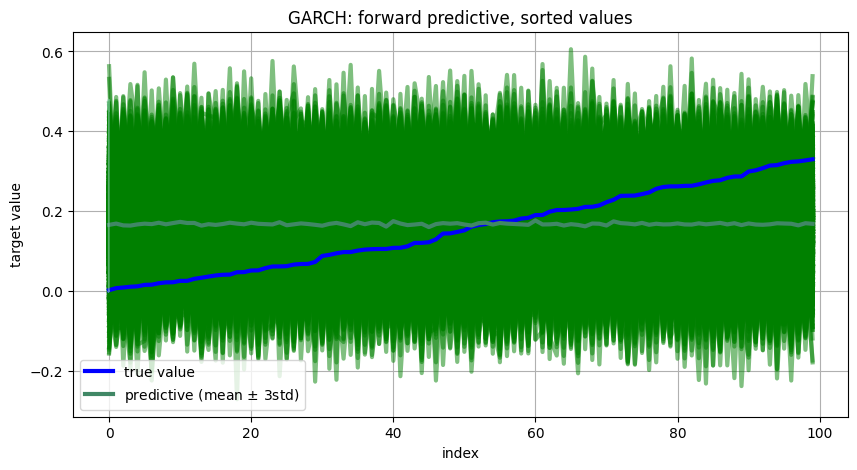

In [48]:
y_pred = torch.tensor(pred_mean)
y_std = torch.tensor(pred_std)

fig, ax = plt.subplots(figsize=(10, 5))

for pred_onedraw in torch.stack(pred_all).T:
    ax.plot(pred_onedraw, linewidth=3, alpha=0.5, color="green")
ax.plot(true, 'b-', linewidth=3, label="true value")
ax.plot(y_pred, '-', linewidth=3, color="#408765", label="predictive (mean $\pm$ 3std)")
ax.fill_between((y_pred - 3 * y_std).squeeze(-1), (y_pred + 3 * y_std).squeeze(-1), alpha=0.6, color='#86cfac', zorder=5)

plt.xlabel("index")
plt.ylabel("target value")
plt.title("GARCH: forward predictive, sorted values")
plt.grid()
plt.legend()

plt.show()

## Backward

In [8]:
pred_f = torch.load("20230724_preds/garch01/predictive.forward.torch")

x_test_f, y_test_f = prepare_simple_1d_time_series(load_garch_time_series(1000), window_len=3, reverse=True)
print(x_test_f.shape, y_test_f.shape)

preds = pred_f(x_test_f)["obs"]
print(preds.shape)

torch.Size([997, 3]) torch.Size([997, 1])
torch.Size([100, 997])
